# Testing different Variations on the Variational Autoencoder



## Input rating matrix info 
Here is the collaborative filtering component where we use the matrix of ratings by the users

In [379]:
import pandas as pd
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

raw_data = pd.read_csv("./data/Movielens100/u.data", sep = None, names=["userId", "movieId", "rating", "timestamp"])
raw_data = raw_data.loc[:, raw_data.columns != "timestamp"]
#make indices start at 0
raw_data["userId"] -= 1
raw_data["movieId"] -= 1
#make ratings center around 0
raw_data["rating"] -= 3

# create (943, 1682) matrix of user ratings per movie
user_ratings = pd.DataFrame(np.zeros((943,1682)))
for i in raw_data.index:
    user_ratings[raw_data["movieId"][i]][raw_data["userId"][i]] = raw_data["rating"][i]
user_ratings = user_ratings.to_numpy() 
user_ratings

C:\Users\leuch\AppData\Local\Temp\ipykernel_19036\2626815215.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv("./data/Movielens100/u.data", sep = None, names=["userId", "movieId", "rating", "timestamp"])


array([[2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.]])

## Import the user information matrix I made 

In [380]:
user_info = pd.read_csv("./data/user_info.csv")
user_info

Unnamed: 0         0    1         2         3         4         5  \
0             0 -0.824422  1.0 -0.528577  0.163282 -0.643886 -0.442094   
1             1  1.554043  0.0 -0.557404  0.549569 -0.003917 -0.419032   
2             2 -0.906438  1.0 -0.557404 -1.036383 -0.238085 -0.557404   
3             3 -0.824422  1.0 -0.557404  1.621949  0.065268 -0.557404   
4             4 -0.086278  0.0 -0.506365 -0.149094 -0.149094  0.004022   
..          ...       ...  ...       ...       ...       ...       ...   
938         938 -0.660390  0.0 -0.557404  2.193939  0.166634 -0.412597   
939         939 -0.168294  1.0 -0.557404  0.284045 -0.557404 -0.304969   
940         940 -1.152486  1.0 -0.557404  1.933286  1.310613  0.999277   
941         941  1.143963  0.0 -0.557404  1.301320  1.208383  0.093149   
942         942 -0.988454  1.0 -0.557404  0.999277 -0.157115 -0.512928   

            6         7         8  ...        11        12        13  \
0   -1.133953  0.682175 -0.240302  ... -0.528577 -0.499749 -0.384440   
1   -0.557404  1.241427  0.411197  ... -0.557404 -0.142289 -0.557404   
2   -0.557404 -1.355702 -0.557404  ... -0.557404 -0.717064 -1.036383   
3   -0.557404  1.933286  1.621949  ... -0.557404 -0.557404 -0.246068   
4   -1.374024 -0.557404 -0.149094  ... -0.608443 -0.455327 -1.220908   
..        ...       ...       ...  ...       ...       ...       ...   
938 -0.412597  2.773170  0.021826  ... -0.412597 -0.557404 -0.557404   
939 -0.052535  1.293784  0.199900  ... -0.557404 -0.304969 -0.557404   
940  0.376605  1.933286 -0.557404  ... -0.557404 -0.557404 -0.557404   
941  1.022511  1.673064 -0.557404  ... -0.371532 -0.371532 -0.371532   
942 -0.646357 -0.646357  0.421081  ... -0.601881 -0.557404 -0.157115   

           14        15        16        17        18        19        20  
0   -0.586232 -0.470922  0.624520  0.682175  0.365074 -0.067338 -0.442094  
1   -0.557404 -0.280661  1.933286 -0.142289  0.411197 -0.280661 -0.557404  
2   -0.876723 -0.238085 -0.238085 -0.876723 -2.154000 -0.717064 -0.557404  
3    0.065268  0.999277  0.687941  0.999277  2.555958  0.376605 -0.557404  
4   -0.353249 -0.557404 -1.220908  0.310254 -0.608443 -0.404288 -0.608443  
..        ...       ...       ...       ...       ...       ...       ...  
938 -0.412597 -0.412597  2.049132  0.745864  1.325094  0.311441 -0.557404  
939 -0.473259 -0.220824  0.536480 -0.473259  0.031610 -0.220824 -0.557404  
940 -0.246068  0.065268  0.065268  1.621949  1.621949  0.065268 -0.557404  
941  0.093149  0.279022  1.673064  0.093149  1.301320  1.022511 -0.092723  
942 -0.423974 -0.468451 -0.290545 -0.557404  0.732417 -0.201591 -0.735311  

[943 rows x 22 columns]

## Make sure to shuffle data

In [375]:
np.shuffle(input!!!)

SyntaxError: invalid syntax (2186882453.py, line 1)

## Begin model and tuning of Hyperparameters

In [385]:
from torch.utils.data import Dataset, DataLoader
from torch import nn 
import torch
from sklearn.metrics import precision_recall_fscore_support
device = "cuda"

class MovielensDataset(Dataset):
    def __init__(self, data, mask_magnitude = 1.3, input_noise = 0):
        # input_noise The variance of the noise 
        
        
        self.data = data
        # create a mask of 0 and 1 values where half are 0 and 0.8 (Default) are 1. 
        #The ratio of masked values is something that can and should be optimized. 
        self.random_mask = np.clip((np.random.randn(1682) + mask_magnitude).round(), a_max = 1, a_min = 0)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        np.random.shuffle(self.random_mask)
        return self.data[idx] * self.random_mask + np.random.randn(1682)*input_noise, self.data[idx]


#noise layers for regularization
class GaussianNoise(nn.Module):
    def __init__(self, stddev):
        super().__init__()
        self.stddev = stddev

    def forward(self, x):
        if self.training:
            return x + torch.autograd.Variable(torch.randn(x.size()).cuda() * self.stddev)
        return x
    

# This is a standard VAE but using MSE as the reconstruction term. 

#Actually just rename this out and make loss function a parameter
class VAE(nn.Module):
    def __init__(self, dropout_rate, fixed_variance = False, deterministicEval = False, noiseLayerStd = 0.2):
        #fixed variance is false if regular or equal to the value of the parameter
        super().__init__()
        self.encoder = nn.Sequential(
            #Encoder
            nn.Linear(1682, 1024),
            nn.LeakyReLU(),
            GaussianNoise(noiseLayerStd),
            nn.Dropout(dropout_rate),
            nn.Linear(1024,1024),
            nn.LeakyReLU(),
            GaussianNoise(noiseLayerStd),
            nn.Dropout(dropout_rate),
        )
        self.decoder = nn.Sequential(
            #Decoder
            nn.Linear(512,1024),
            nn.LeakyReLU(),
            GaussianNoise(noiseLayerStd),
            nn.Dropout(dropout_rate),
            nn.Linear(1024,1682),
            nn.Tanh()
        )
        # distribution parameters
        self.fc_mu = nn.Linear(1024, 512)
        self.fc_var = nn.Linear(1024, 512)
        
        
        self.log_scale = nn.Parameter(torch.Tensor([0.0]))
        #for evaluation purposes
        self.test_mse = 1000
        self.mse_loss_fcn = nn.MSELoss()
        # for varieties of VAE
        self.fixed_variance = fixed_variance
        self.deterministicEval = deterministicEval
        
    def gaussian_likelihood(self, x_hat, logscale, x):
        scale = torch.exp(logscale)
        mean = x_hat
        dist = torch.distributions.Normal(mean, scale)

        # measure prob of seeing data under p(x|z)
        log_pxz = dist.log_prob(x)
        return log_pxz.sum(dim=1)
    
    def kl_divergence(self, z, mu, std):
        # --------------------------
        # Monte carlo KL divergence
        # --------------------------
        # 1. define the first two probabilities (in this case Normal for both)
        p = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(std))
        q = torch.distributions.Normal(mu, std)

        # 2. get the probabilities from the equation
        log_qzx = q.log_prob(z)
        log_pz = p.log_prob(z)

        # kl
        kl = (log_qzx - log_pz)
        kl = kl.sum(-1)
        return kl
    
    def forward(self, x):
        
        
        
        
        # encode x to get the mu and variance parameters
        x_encoded = self.encoder(x)
        mu, log_var = self.fc_mu(x_encoded), self.fc_var(x_encoded) if self.fixed_variance == False else self.fc_var(x_encoded) / self.fc_var(x_encoded) * self.fixed_variance
        
        # sample z from q
        std = torch.exp(log_var / 2)
        if self.training == False and self.deterministicEval == True:
            std = std * 0
    
        #perform the kernel trick to allow for backprop through sampling
        
        epsilon = torch.distributions.Normal(0, 1).rsample()
        z = mu + epsilon * std
        # decoded
        ratings = self.decoder(z) * 2
        return ratings, z, mu, std
    
    def vae_loss(self, x_hat, x, z, mu, std):
        # reconstruction loss. This is now MSE instead of gaussian likelihood
        #indies = x.nonzero().split(1, dim=1)
        
        #recon_loss = ((x[indies] - x_hat[indies]) ** 2).sum() 
        recon_loss = self.mse_loss_fcn(x_hat, x) * 10000#self.gaussian_likelihood(x_hat, self.log_scale, x)
        
        # kl
        if self.training == True and self.deterministicEval:
            kl = self.kl_divergence(z, mu, std)
        else:
            kl = 0
        
        # elbo
        elbo = (kl + recon_loss).mean()

        return elbo

def train(dataloader, model,  optimizer, epoch):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
        
        #compute prediction error
        pred, z, mu, std = model(X)
        loss = model.vae_loss(pred, y, z, mu, std)
        mse_loss = mse_loss_fcn(pred, y)
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0 and batch % 64 == 0:
            loss , current = loss.item(), (batch+1) * len(X)
            print("Epoch : " + str(epoch))
            print(f"loss: {loss:>7f}")
            print(f"MSE loss: {mse_loss:>7f}")
            losses.append(loss)
            mse_losses.append(mse_loss.item())

def test(dataloader, model, epoch):
    size = len(dataloader.dataset)
    num_batches= len(dataloader)
    model.eval()
    test_loss, correct, test_mse_loss = 0,0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
            
            
            pred, z, mu, std = model(X)
            test_loss += model.vae_loss(pred, y, z, mu, std).item()
            test_mse_loss += mse_loss_fcn(pred, y)
    test_loss /= num_batches
    test_mse_loss /= num_batches
    if epoch % 100 ==0:
        test_losses.append(test_loss)
        #Calculate RMSE on just the rated ones like the papers do 
        nonzero_indices = y.nonzero().split( 1, dim=1)
        relevant_rmse = torch.sqrt(mse_loss_fcn(y[nonzero_indices], pred[nonzero_indices]))#torch.sqrt((y[nonzero_indices] - pred[nonzero_indices] ** 2).mean())
        
        print(f"Test Error: \n Avg Loss : {test_loss:>8f} ")
        print(f" Test MSE loss: {test_mse_loss:>7f}")
        print("Relevant RMSE loss: " + str(relevant_rmse.item()))
        test_mse_losses.append(test_mse_loss.item())
        model.test_mse = relevant_rmse.item()
        
        
        

## The actual search 
The following contains all of the logic you need to do to restart everything over so long as you've already loaded the ones above

In [386]:
epochs = 1000
lowest_test_mse_score = 1000
mask_magnitude = 1.3
#input noise is to add noise to training data, 0 unless you want to make it a denoising AE.
input_noise = 0.1

#Search 
l2_weight = 0
dropout_rate = 0
random_mask = np.clip((np.random.randn(1682) + mask_magnitude).round(), a_max = 1, a_min = 0)
print("using hyperparameters : " + str( l2_weight) + " , " + str(dropout_rate))
train_dataset = MovielensDataset(user_ratings[:843], mask_magnitude, input_noise)
test_dataset = MovielensDataset(user_ratings[843:], mask_magnitude)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)


losses = []
mse_losses = []    
test_losses = []
test_mse_losses = []

model = VAE(dropout_rate = dropout_rate, fixed_variance = False, deterministicEval = True,noiseLayerStd = 0.0 ).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4, weight_decay = l2_weight)
mse_loss_fcn = nn.MSELoss()

for t in range(epochs):
    train(train_dataloader, model,  optimizer, t)
    test(test_dataloader, model, t )
    if t % 100 == 0:
        if model.test_mse < lowest_test_mse_score:
            lowest_test_mse_score = model.test_mse
            torch.save(model.state_dict(), "./models/best.pth")
            print("New best using hyper parameters : " + str(mask_magnitude) + " ," + str(l2_weight) + " ," + str(dropout_rate)  )

using hyperparameters : 0 , 0
Epoch : 0
loss: 2955.345215
MSE loss: 0.295581
Test Error: 
 Avg Loss : 997.214111 
 Test MSE loss: 0.099721
Relevant RMSE loss: 1.4413456916809082
New best using hyper parameters : 1.3 ,0 ,0
Epoch : 100
loss: 485.929413
MSE loss: 0.042434
Test Error: 
 Avg Loss : 689.843079 
 Test MSE loss: 0.068984
Relevant RMSE loss: 1.0984346866607666
New best using hyper parameters : 1.3 ,0 ,0
Epoch : 200
loss: 303.457062
MSE loss: 0.026637
Test Error: 
 Avg Loss : 656.985657 
 Test MSE loss: 0.065699
Relevant RMSE loss: 1.058893084526062
New best using hyper parameters : 1.3 ,0 ,0
Epoch : 300
loss: 286.447571
MSE loss: 0.023662
Test Error: 
 Avg Loss : 648.942139 
 Test MSE loss: 0.064894
Relevant RMSE loss: 1.0481297969818115
New best using hyper parameters : 1.3 ,0 ,0
Epoch : 400
loss: 168.523880
MSE loss: 0.016017
Test Error: 
 Avg Loss : 639.884766 
 Test MSE loss: 0.063988
Relevant RMSE loss: 1.0354050397872925
New best using hyper parameters : 1.3 ,0 ,0
Epoch :

KeyboardInterrupt: 

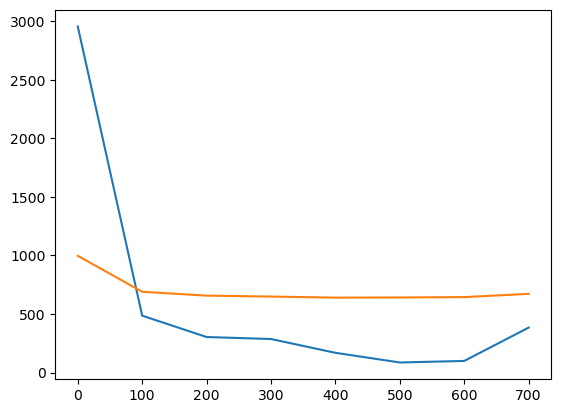

In [387]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(losses)) * 100, losses)
plt.plot(np.arange(len(test_losses)) * 100, test_losses)

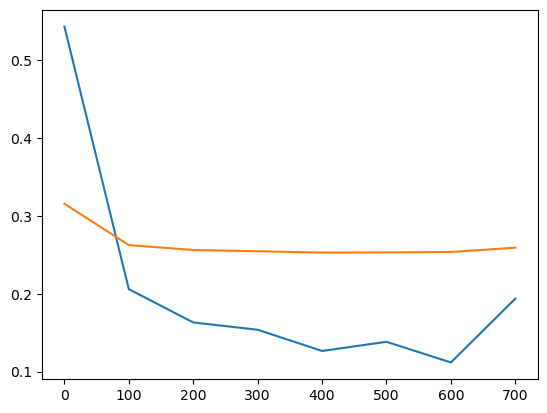

In [388]:
plt.plot(np.arange(len(mse_losses)) * 100, np.sqrt(np.array(mse_losses)))
plt.plot(np.arange(len(test_mse_losses)) * 100, np.sqrt(np.array(test_mse_losses)))

# Calculate Precision and Recall

In [397]:
model = VAE(dropout_rate = 0, deterministicEval = True).to(device)
model.load_state_dict(torch.load("./models/best.pth"))
model.eval()
relevance_labels = user_ratings[843:] > 0.5
#To evaluate for comparison to other papers we mask by setting 20% of labels to false 
test_inputs = np.clip((np.random.randn(1682) + 1.35).round(), a_max = 1, a_min = 0) * user_ratings[843:]
with torch.no_grad():
    test_preds = model(torch.tensor(test_inputs).to("cuda").to(torch.float32))[0] > .5

precision_recall_fscore_support(relevance_labels.flatten(), test_preds.cpu().flatten(), average="binary")

(0.6875434933890049, 0.48046685038093695, 0.565648854961832, None)

In [398]:
with torch.no_grad():
    test_preds = model(torch.tensor(test_inputs).to("cuda").to(torch.float32))[0] > .42

    print(precision_recall_fscore_support(relevance_labels.flatten(), test_preds.cpu().flatten(), average="binary"))
    nonzero_indices = torch.tensor(test_inputs).to("cuda").nonzero().split( 1, dim=1)
    print(torch.sqrt(mse_loss_fcn(torch.tensor(test_inputs).to("cuda")[nonzero_indices], model(torch.tensor(test_inputs).to("cuda").to(torch.float32))[0][nonzero_indices])
                ))

(0.6332954114524081, 0.5414167612254822, 0.583762999213493, None)
tensor(0.9932, device='cuda:0', dtype=torch.float64)


# Calculate rmse

In [338]:
nonzero_indices = torch.tensor(test_inputs).to("cuda").nonzero().split( 1, dim=1)
torch.sqrt(((torch.tensor(test_inputs).to("cuda")[nonzero_indices] - model(torch.tensor(test_inputs).to("cuda").to(torch.float32))[0][nonzero_indices]) ** 2).mean())

tensor(0.9769, device='cuda:0', dtype=torch.float64, grad_fn=<SqrtBackward0>)

## Conclusion:
The result is that I was, in fact, correct and it creates a noticeable improvement in the algorithm

(array([0.0000e+00, 1.1000e+01, 2.3000e+01, 1.0932e+04, 6.1663e+04,
        7.1087e+04, 2.2324e+04, 7.7400e+02, 1.3480e+03, 3.8000e+01]),
 array([-2.1, -1.9, -1.1, -0.9, -0.1,  0. ,  0.1,  0.9,  1.1,  1.9,  2.1]),
 <BarContainer object of 10 artists>)

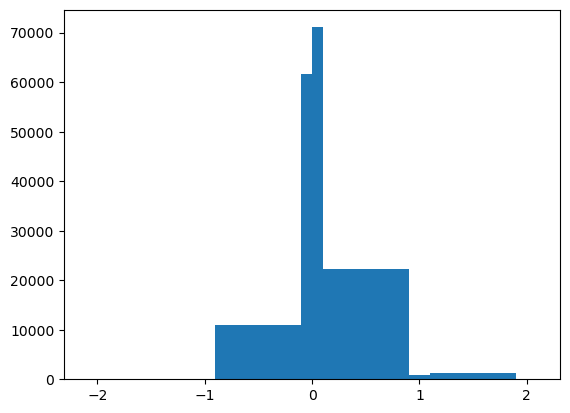

In [256]:
import matplotlib.pyplot as plt
plt.hist(model(torch.tensor(test_inputs).to("cuda").to(torch.float32))[0].cpu().detach().numpy().flatten(), bins = [-2.1, -1.9, -1.1, -0.9, -.1, 0, .1, .9, 1.1, 1.9, 2.1])

In [ ]:
plt.hist(test_inputs.flatten(), bins = [-2.1, -1.9, -1.1, -0.9, -.1, 0, .1, .9, 1.1, 1.9, 2.1])

In [349]:
user_ratings[843:].mean()

0.04012485136741974